In [12]:
# Homework 4 Assignment 2 for PUI
# Using CitiBike data from February 2015 
# Data located in PUIDATA

In [141]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

#if os.getenv ('PUI2018') is None:
    #print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

#s = json.load( open(os.getenv('PUI2018') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


#Null and alternative hypothesis

#H_null: CitiBike users born in 1980 are just as likely or more likely to use the service than those born 
 in 1981. 

 H_alt : CitiBike users born in 1981 are more likely to use the service than those born between 1980.

#Formula for Hnull : Mean_1980 >= Mean_1981

#Formula for Halt : Mean_1981 > Mean_1980

In [143]:
# making sure environment variable PUIDATA works 

#os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
#print("PUI2018", os.getenv("PUI2018"))
os.environ['PUIDATA'] = '/nfshome/cb4221/PUIDATA'
!ls $PUIDATA


201501-citibike-tripdata.csv  201509-citibike-tripdata.csv  scores.csv
201501-citibike-tripdata.zip  201509-citibike-tripdata.zip  tripdata.csv
201502-citibike-tripdata.csv  construction_projects.csv     water.csv
201502-citibike-tripdata.zip  satscores.csv


In [144]:
#!curl https://s3.amazonaws.com/tripdata/201805-citibike-tripdata.csv.zip > tripdata.csv

In [145]:
# moving trip data to PUIDATA and making sure it is in there
#!mv tripdata.csv $PUIDATA
#!ls $PUIDATA

In [146]:
### unzip the csv 
#os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

In [147]:
# reading data in with pandas
#trips = pd.read_csv("%s/tripdata.csv"%os.getenv("PUIDATA"),engine = 'python')

In [148]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [149]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [150]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [151]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [152]:
# dropping everything but birth year and date
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)
df.head()
# df.tail() there are 196929 rows in this reduced dataset

,birth year,date
0,1978.0,2015-02-01 00:00:00
1,1993.0,2015-02-01 00:00:00
2,1969.0,2015-02-01 00:01:00
3,1985.0,2015-02-01 00:01:00
4,1957.0,2015-02-01 00:01:00


In [153]:
# df1.columns = ['Customer_unique_id', 'Product_type', 'Province'] 
df.columns = ['birth_year', 'date'] #renaming birth year to birth_year
# df.head() # checking to make sure renaming worked (it does)


df_1980 = df[df.birth_year >= 1980] #drops births that are before 1980
df_80s = df_1980[df_1980.birth_year <= 1981] #drops births that are after 1981
df_80s.sort_values(by='birth_year',ascending=0) #shows birth years from 1980 to 1981


,birth_year,date
196922,1981.0,2015-02-28 23:56:00
79459,1981.0,2015-02-11 22:11:00
155564,1981.0,2015-02-24 13:01:00
79728,1981.0,2015-02-11 23:26:00
155574,1981.0,2015-02-24 13:03:00
79671,1981.0,2015-02-11 23:08:00
155590,1981.0,2015-02-24 13:07:00
79614,1981.0,2015-02-11 22:49:00
155633,1981.0,2015-02-24 13:17:00
155644,1981.0,2015-02-24 13:20:00


In [154]:
eighty = df_80s['date'][df_80s['birth_year'] == 1980.0]
a = len(eighty)

In [155]:
eighty_one = df_80s['date'][df_80s['birth_year'] == 1981.0]
b = len(eighty_one)
print(a)
print(b)

6274
6144


Text(0.5,1,'Ridership for People Born in 1980 and 1981')

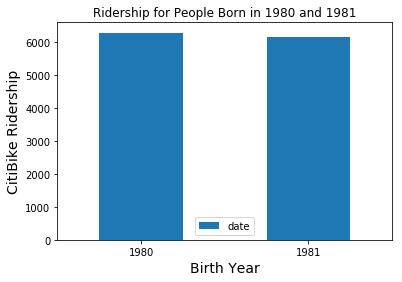

In [157]:
#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
#>>> ax = df.plot.bar(x='lab', y='val', rot=0)

df = pd.DataFrame({'birth_year':['1980', '1981'], 'date':[len(eighty), len(eighty_one)]})
ax = df.plot.bar(x='birth_year', y='date', rot=0)
plt.xlabel('Birth Year', fontsize=14)
plt.ylabel('CitiBike Ridership', fontsize=14)
plt.title('Ridership for People Born in 1980 and 1981')


Figure 1: Total ridership for CitiBike users born in 1980 and 1981, respectively. Data is from February 2015. 